# Математика для анализа данных. Снижение размерности

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Метод главных компонент (Principal Component Analysis, PCA)

### Теория

Обозначим $X$ - матрицу объекты-признаки, с нулевым средним каждого признака,
а $w$ - некоторый единичный вектор. Тогда
$Xw$ задает величину проекций всех объектов на этот вектор. Далее ищется вектор,
который дает наибольшую дисперсию полученных проекций (то есть наибольшую дисперсию
вдоль этого направления):

$$
    \max_{w: \|w\|=1} \| Xw \|^2 =  \max_{w: \|w\|=1} w^T X^T X w
$$

Подходящий вектор тогда равен собственному вектору матрицы $X^T X$ с наибольшим собственным
значением. 

### PCA на плоскости

Для начала посмотрим на метод PCA на плоскости для того, чтобы
лучше понять, как он устроен.

Создадим выборку из двух сильно зависящих признаков.

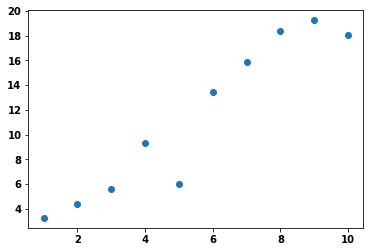

In [5]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10) * 2
X = np.vstack((x,y))

plt.scatter(X[0],X[1])

Mean vector:  [ 5.5        11.35328852]
[[-4.5        -3.5        -2.5        -1.5        -0.5         0.5
   1.5         2.5         3.5         4.5       ]
 [-8.09347478 -6.97318192 -5.75867956 -2.04948289 -5.34078856  2.08564379
   4.55098512  6.99642371  7.90106679  6.68148829]]


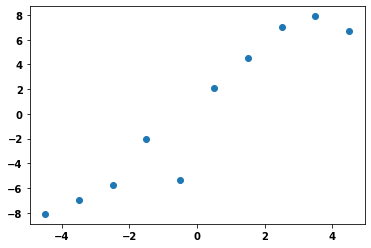

In [6]:
#Find m - mean vector, and Xcentered - X-mean
#Your code is here

Xcentered = X - X.mean(axis=1, keepdims=True)
m = np.mean(X, axis=1)

print("Mean vector: ", m)
print(Xcentered)

plt.scatter(Xcentered[0],Xcentered[1])

Вычисляем матрицу ковариаций

In [7]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 9.16666667 18.22765341]
 [18.22765341 40.12187285]] 

Variance of X:  9.166666666666666
Variance of Y:  40.121872845875856
Covariance X and Y:  18.22765341029929


Находим собственные векторы матрицы ковариаций и проецируем на самый большой вектор (с самым большим собственным значением) все точки

In [8]:
eignums, vecs = np.linalg.eig(covmat)
v = vecs[:,np.argmax(eignums)]
Xnew = np.dot(v,Xcentered)
print(Xnew)

[ 9.23499548  7.79832056  6.27614662  2.48993468  5.05696742 -2.10278925
 -4.76015116 -7.39945051 -8.64041436 -7.9535595 ]


Восстановление данных

In [9]:
n = 3 #номер элемента случайной величины
Xrestored = np.dot(Xnew[n],v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Restored:  [4.45431971 9.09357007]
Original:  [4.         9.30380563]


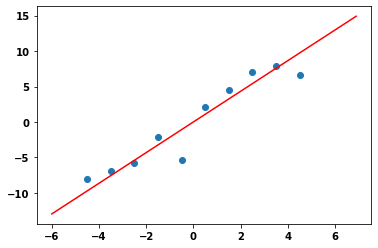

In [17]:
k = v[1]/v[0]

x1 = np.arange(-6,7,0.1)
y1 = [k*elem for elem in x1]
plt.scatter(Xcentered[0],Xcentered[1])
plt.plot(x1,y1,'-',c='red')
plt.show()

Доля объясненной дисперсии

In [18]:
100 * max(eignums)/sum(eignums)

98.51516051788506

Проверим, что нам выдаст PCA из sklearn

In [19]:
from sklearn.decomposition import PCA

#Apply PCA with n_components=1 to transposed Xcentered
#Your code is here
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xcentered.T)

In [20]:
pca.components_

array([[-0.41996294, -0.90754125],
       [ 0.90754125, -0.41996294]])

In [21]:
Xcentered

array([[-4.5       , -3.5       , -2.5       , -1.5       , -0.5       ,
         0.5       ,  1.5       ,  2.5       ,  3.5       ,  4.5       ],
       [-8.09347478, -6.97318192, -5.75867956, -2.04948289, -5.34078856,
         2.08564379,  4.55098512,  6.99642371,  7.90106679,  6.68148829]])

In [22]:
X_pca

array([[ 9.23499548, -0.68497618],
       [ 7.79832056, -0.2479164 ],
       [ 6.27614662,  0.14957887],
       [ 2.48993468, -0.50060502],
       [ 5.05696742,  1.78916264],
       [-2.10278925, -0.42212247],
       [-4.76015116, -0.54993321],
       [-7.39945051, -0.66938554],
       [-8.64041436, -0.14176085],
       [-7.9535595 ,  1.27795817]])

Сравним полученный вектор главной компоненты с нашим ответом

In [23]:
print(v)
print(pca.components_)

[-0.41996294 -0.90754125]
[[-0.41996294 -0.90754125]
 [ 0.90754125 -0.41996294]]


Доля объясненного разброса по мнению встроенного PCA

In [24]:
pca.explained_variance_ratio_[0] * 100

98.51516051788506

## Сингулярное разложение, SVD (Singular Value Decomposition)

In [26]:
import numpy as np
 
#Creating a matrix A
A = np.array([[3,4,3],[1,2,3],[4,2,1]])
 
#Performing SVD
U, D, VT = np.linalg.svd(A)
 
#Checking if we can remake the original matrix using U,D,VT
A_remake = (U @ np.diag(D) @ VT)
print(A_remake)

[[3. 4. 3.]
 [1. 2. 3.]
 [4. 2. 1.]]
